# Notebook to add more rfi scamples for training/testing

* `comms_rfi.ipynb` similar to this notebook, but for comms RFI not ground rfi.
* `label_ro_nb.ipynb` (notebook for assigning labels to dataset) + `view_ro_for_labels.ipynb` (notebook for viewin samples from `/scripts/make_label_plots.py` to assign labels)

## RFI in Ann's/Clara's results of 6 month data

It seems the model is not identifying ground sources of RFI, likely due to largely being trained by internal/comms/airborne RFI.


## Workflow

* make_label_plots for specific threshold:
36 N 31 E
29 N 36 E
    * l2 or l1 sigma_phi >0.05 **OR**
    * max_rfi > .05



In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import sys  
sys.path.insert(1, '/home/stdi2687/leo-ml/scripts')

from feature_extract_util import *
from ml_util import *

In [2]:
all_fdf=pd.read_pickle('../data/data/feature_set_all_single_file/all_fdf_v2.pkl')

In [3]:
len(all_fdf)

677987

In [4]:
lats=[29,36]
lons=[31,36]
win_df=all_fdf[all_fdf.lat_m.between(lats[0], lats[1])]
win_df=win_df[win_df.lon_m.between(lons[0], lons[1])]
win_df=win_df[win_df.rfi_max>3e-4]

In [5]:
len(win_df['sample'].unique())

41

<AxesSubplot:>

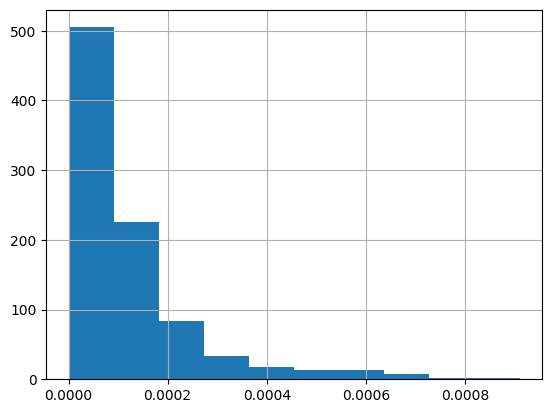

In [22]:
win_df.rfi_max.hist()

In [8]:
#max_rfi=[]
rfi_labels_li=[]
count=0

for sample_ in win_df.sort_values(by=['rfi_max'])['sample'].unique()[:]:

    fn1='/media/datastore/mirror/spwxdp/repro4/spire/level1b/scnPhs/%s/scnPhs_%s.0001_nc'%(sample_[:8],sample_)
    fn2='/media/datastore/mirror/spwxdp/repro4/spire/level2/scnLv2/%s/scnLv2_%s.0001_nc'%(sample_[:8],sample_)

    try:
        lv1=xr.open_dataset(fn1, decode_times=False)
        lv2=xr.open_mfdataset(fn2, decode_times=False)
        # keep for viewing distribution of max's
        
        feature_pkl='../data/data/feature_sets/%s.pkl' %sample_
        import os.path
        if os.path.isfile(feature_pkl):
            rfi_labels_li+=[sample_]
            count+=1
            continue
        fdf=extract_fs(lv1,lv2)
        plot_leo_feat_RFI(sample_, lv1,lv2,fdf)
        fdf.to_pickle('../data/data/feature_sets/%s.pkl' %sample_)
        count+=1
        rfi_labels_li+=[sample_]

    except Exception as ex:
        print(ex)
        #print(file_n)


# Save dataframe of samples created
li_ln=len(rfi_labels_li)
converted_labels_scint_dict={"Filename":rfi_labels_li, "Approx time (s)":np.full(li_ln, np.nan) ,	
 "Label":np.full(li_ln, "rfi 2") ,	"Unnamed: 4":np.full(li_ln, np.nan) ,	
 "Unnamed: 5":np.full(li_ln, np.nan) ,	"labeled?":np.full(li_ln, False) }

converted_labels_scint_df=pd.DataFrame(converted_labels_scint_dict)
converted_labels_scint_df.to_pickle('../data/converted_labels_rfi2.pkl')

/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/stdi2687/gnss-leo-data/.venv/lib/python3.7/site-packages/numpy/lib/nan

In [45]:
converted_labels_scint_df

,Filename,Approx time (s),Label,Unnamed: 4,Unnamed: 5,labeled?
0,2022.319.122.19.01.G15.SC001_0001,NaN,Scint 2,NaN,NaN,False
1,2022.327.149.19.01.G23.SC001_0001,NaN,Scint 2,NaN,NaN,False
